<a href="https://colab.research.google.com/github/Alireza-Amani/Data_Assimilation/blob/master/lorenz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sebastian Reich, Colin Cotter   
 **Probabilistic Forecasting and Bayesian Data Assimilation** 

**Introduction**

Within this notebook there is a Lorenz63 class which is based on Lorenz 63 meteorological (toy) model. 



The Lorenz equations:


$$\dot{x} = \sigma (y - x)$$ 

$$\dot{y} = \rho x - y -xz$$

$$ \dot{z} = xy - \beta z$$


The system is solved by a forward Euler scheme (finite difference). 










# Tools

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from os import chdir
from mpl_toolkits import mplot3d
from plotly import graph_objects as go
from matplotlib import style
from matplotlib import rcParams

style.use("seaborn")

rcParams['figure.figsize'] = [15, 9]
rcParams['font.size'] = 24
rcParams['font.weight'] = 'bold'
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 18
rcParams['axes.labelweight'] = 'bold'


try:
  chdir("/Users/alireza_amani/Google Drive/Colab Notebooks")

except:
  chdir("/content/drive/My Drive/Colab Notebooks")


#%cd /content/drive/My Drive/Colab Notebooks
#%cd /Users/alireza_amani/Google Drive/Colab Notebooks


%xmode Verbose

import font_output
font_output.increase_font()
font_output.font()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exception reporting mode: Verbose


<IPython.core.display.Javascript object>

'Done Sir, your font is bigger now, let me know if u needed anything else'

# Lorenz Class

In [24]:
# i better change the for loops with vectorized stuff! 
class Lorenz63():
  '''
  write some stuff here


  '''


  import numpy as np
  import matplotlib.pyplot as plt
  from matplotlib import style
  style.use('seaborn')
  from mpl_toolkits import mplot3d

  def __init__(self, T_0=0 , T=200, step=0.001, 
               sigma=10, ro=28, beta=8/3, 
               ini_state=[-0.587, -0.563, 16.870]):

    self.T_0 = T_0
    self.T = T
    self.step = step
    self.sigma = sigma
    self.ro = ro
    self.beta = beta
    self.ini_state = ini_state
    self.N = int((self.T - self.T_0)/self.step)

    self.f1 = lambda x, y: self.sigma * (y - x)
    self.f2 = lambda x, y, z: (x * (self.ro - z) ) - y
    self.f3 = lambda x, y, z: (x * y) - (self.beta * z)

    self.g = np.zeros((3, self.N))
    self.a = (np.sqrt(self.step))**-1
    self.g[0, 0] = self.a * (2**-0.5 - 0.5)
    self.g[1, 0] = self.a * (3**-0.5 - 0.5)
    self.g[2, 0] = self.a * (5**-0.5 - 0.5)

    self.g_1 = lambda g: (1.99999 * g) + (self.a/2)   # if g elem of [-a/2, 0)
    self.g_2 = lambda g: (-1.99999 * g) + (self.a/2)  # otherwise

    # creating the forcing  -- sort of like white noise, ok?!
    for j1 in range(self.N-1):

      self.g[:, j1+1] = (  ( (self.g[:, j1] < 0) * self.g_1(self.g[:, j1]) )   
      
                                  +  ( (self.g[:, j1] >= 0) * self.g_2(self.g[:, j1]) )

      )

    print("A new Lorenz63 is born\n")

  def about_me(self):
    info = "Hi, Lorenz at your service. \n"
    info += f"The simulation time starts from {self.T_0} and it ends at time {self.T}.\n"
    info += f"Temporal discretization step of simulation is {self.step}.\n"
    info += f"Simulation starts from x = {self.ini_state[0]}, y = {self.ini_state[0]}, z = {self.ini_state[0]}.\n"
    info += f"model parameters are sigma = {self.sigma}, ro = {self.ro}, and beta = {self.beta:.3}"
    print(info)


  
    
    
    

  def truth(self, start=None, end=None, every=1):

    if (start == None or end == None):
      start = self.T_0
      end = self.T
    
    x = np.zeros(self.N)
    x[0] = self.ini_state[0]

    y = np.zeros(self.N)
    y[0] = self.ini_state[1]

    z = np.zeros(self.N)
    z[0] = self.ini_state[2]

    r1 = int(start/self.step)
    r2 = int(end/self.step)
    for i1 in range(r1, r2-1):

      x[i1+1] = x[i1] + self.step * ( self.f1(x[i1], y[i1]) + self.g[0, i1])
      y[i1+1] = y[i1] + self.step * ( self.f2(x[i1], y[i1], z[i1]) + self.g[1, i1])
      z[i1+1] = z[i1] + self.step * ( self.f3(x[i1], y[i1], z[i1]) + self.g[2, i1])

    return np.array([x[r1:r2:every], y[r1:r2:every], z[r1:r2:every]])


  def model(self, start=None, end=None, initials=[None], every=1):

    x_model = np.zeros(self.N)
    y_model = np.zeros(self.N)
    z_model = np.zeros(self.N)

    # initial conditions
    if initials[0] == None:

      x_model[0] = self.ini_state[0]
      y_model[0] = self.ini_state[1]
      z_model[0] = self.ini_state[2]
    else:
      x_model[0] = initials[0]
      y_model[0] = initials[1]
      z_model[0] = initials[2]


    if (start == None or end == None):
      start = self.T_0
      end = self.T
    r1 = int(start/self.step)
    r2 = int(end/self.step)
    for i1 in range(r1, r2-1):

      x_model[i1+1] = x_model[i1] + self.step * ( self.f1(x_model[i1], y_model[i1]) )
      y_model[i1+1] = y_model[i1] + self.step * ( self.f2(x_model[i1], y_model[i1], z_model[i1]) )
      z_model[i1+1] = z_model[i1] + self.step * ( self.f3(x_model[i1], y_model[i1], z_model[i1]) )

    R = np.array([x_model[r1:r2:every], y_model[r1:r2:every], z_model[r1:r2:every]])
    return R




  def obser(self, start=None, end=None, time_step=0.05):

    if ((start == None) and (end == None)):
      start = self.T_0
      end = self.T
    

    ts_obs = time_step
    n_obs = int((end - start)/ts_obs)


    a1 = 4
    eps_0 = a1 * (2**-0.5 - 0.5)
    eps_1 = lambda epsilon: (1.99999 * epsilon) + a1/2
    eps_2 = lambda epsilon: (-1.99999 * epsilon) + a1/2

    eps = np.zeros(4000 * 200)
    eps[0] = eps_0
    for j2 in range(4000 * 200 - 1):
      eps[j2+1] = ( ((eps[j2] < 0) * eps_1(eps[j2])) +
                    ((eps[j2] >= 0) * eps_2(eps[j2]))
          
      )




    xi = np.zeros(int(n_obs * 20))
    for j3 in range(int(xi.size) ):
      xi[j3] = eps[10*j3]



    obs_error = np.zeros(4000)
    

    for j4 in range(n_obs):

      obs_error[j4] = 1/20 * (np.sum(xi[(j4)*20 : 20*(j4+1)]))
      

    x = Lorenz63.truth(self, start, end, every=1)[0]
    obs_nan = np.full(self.N, np.nan)
    obs_plus = np.full(self.N, np.nan)
    x_obs = np.zeros(n_obs)

    for j5 in range(n_obs):
      x_obs[j5] = x[50*j5] + obs_error[j5]
      obs_nan[j5*50] = x_obs[j5]
      obs_plus[50*j5] = x_obs[j5] 

    return x_obs


  def plot_model(self, start=None, end=None, every=1):

    if (start == None or end == None):
      start = self.T_0
      end = self.T


    x_model, y_model, z_model = Lorenz63.model(self, start, end, every=every)
    # model attractor 
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x_model, y_model, z_model, 'blue')
    ax.set_xlabel('x_model', fontsize=20)
    ax.set_zlabel('z_model')
    ax.set_ylabel('y_model')

    plt.show()   



  def plot_truth(self, start=None, end=None, every=1):

    

    if (start == None or end == None):
      start = self.T_0
      end = self.T

    x, y, z = Lorenz63.truth(self, start, end, every=every)

    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'blue')
    ax.set_xlabel('x', fontsize=20)
    ax.set_zlabel('z')
    ax.set_ylabel('y')

    plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

How about saving some of these objects/arrays with joblib?!

Nah! How bout making them functions , or class ?!! 


lass lorenz() ?

- truth 
- imperfect model 
- observation of x

# PF

In [25]:
lorenz = Lorenz63()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A new Lorenz63 is born



In [17]:
lorenz.ini_state

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[-0.587, -0.563, 16.87]

In [28]:
ini_50 = lorenz.model(0, 0.1)
ini_50[:, -1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([-0.82902927, -1.34327982, 13.00641156])

In [29]:
true_50 = lorenz.truth(0, 0.1)
true_50[:, -1]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([-0.77587485, -1.30361637, 12.96458348])

In [30]:
obs_50 = lorenz.obser(0, 0.05)
obs_50

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([-0.51047666])

In [ ]:
M = 100
x_p = np.random.normal(loc=-0.587, size=M)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

50.0

In [ ]:
len(lorenz.model(0, 1))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1000

##   

\\

\\

\\


# Lorenz 63 model

### Surrogate physical system (truth)

<IPython.core.display.Javascript object>

A new Lorenz63 is born



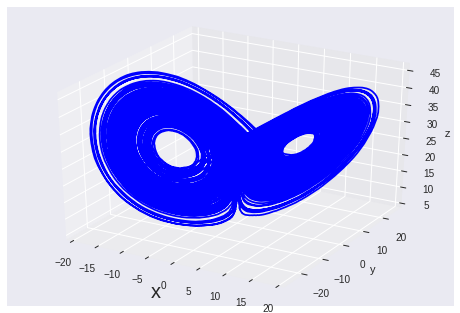

In [ ]:
lorenz = Lorenz63()
lorenz.plot_truth()

## Model 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A new Lorenz63 is born



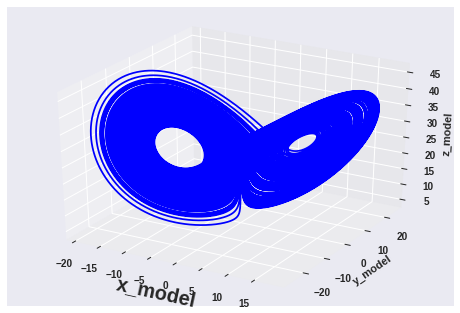

In [ ]:
lorenz = Lorenz63()
lorenz.plot_model()



## Model vs Truth

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

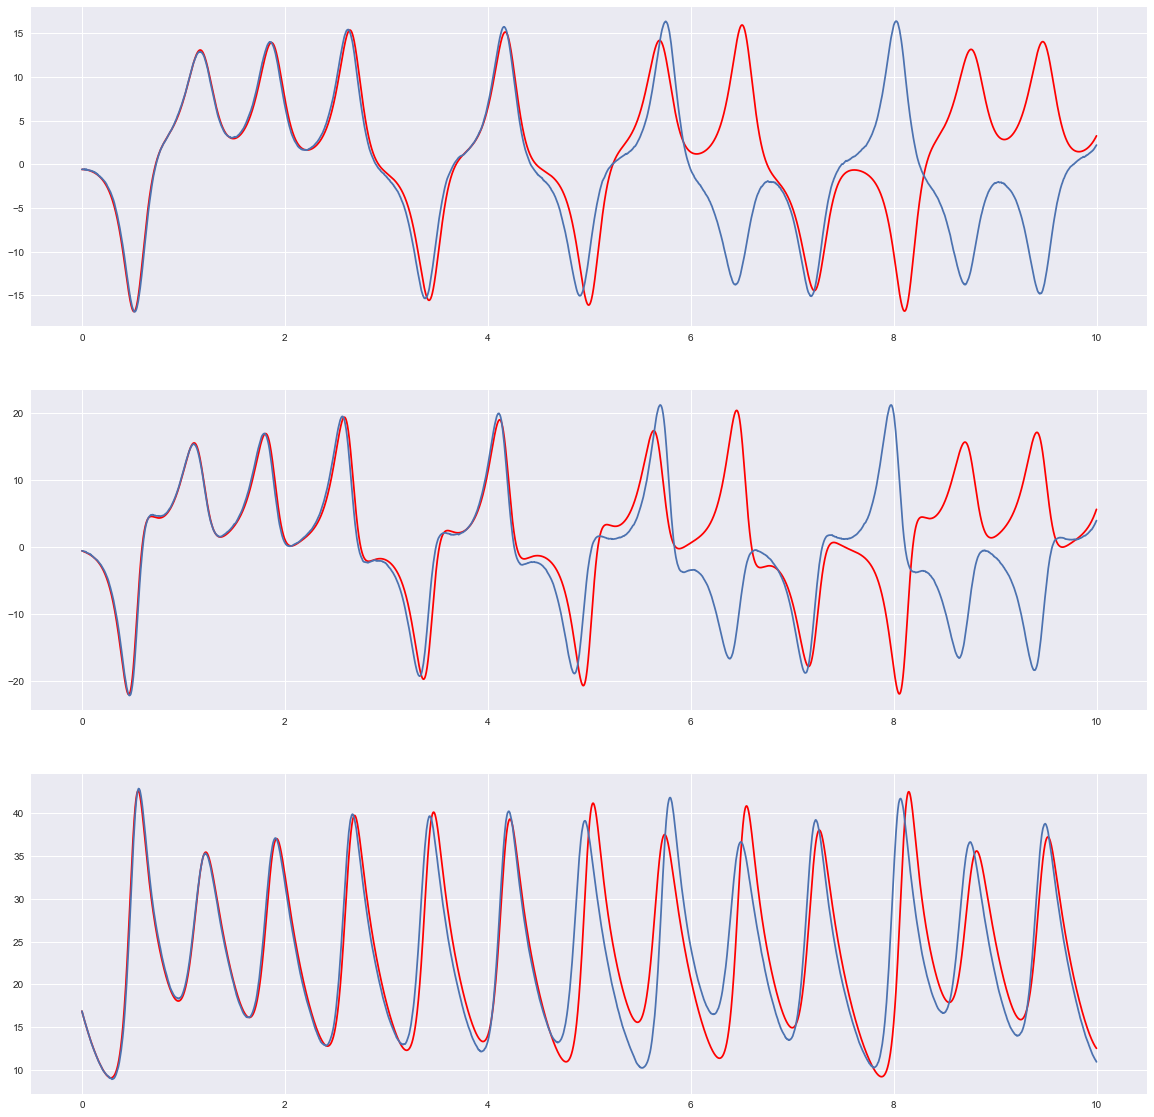

In [ ]:
x_model, y_model, z_model = lorenz.model()


fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 20))


t_s = 0.001
t = np.arange(0, 10, t_s)

s = len(t)

ax[0].plot(t, x_model[:s], color='r')
ax[0].plot(t, x[:s])

ax[1].plot(t, y_model[:s], color='r')
ax[1].plot(t, y[:s])

ax[2].plot(t, z_model[:s], color='r')
ax[2].plot(t, z[:s])

plt.show()


# Data-Drive Forecasting

### AR(1)

$$ y_{predict}(t) = y_{obs}(t_{k^*}) + (t - t_{k^*}) \dfrac{y_{obs}(t_{k^*}) - y_{obs}(t_{k^* + 1})}{\Delta t}        $$

In [ ]:
delta_t = 0.05
step = 0.05
st = int(step/delta_t)

AR1 = lambda y, y_1, step, delta_t: y + ( (step) * ((y - y_1) / delta_t) )

start = int(100/delta_t)
end = int(200/delta_t)


x_preds = np.full(n_obs, np.nan)

for t1 in range(start, end-1):
  x_preds[t1 + 1] = AR1(x_obs[t1], x_obs[t1 - 1], step, delta_t)

fig, ax = plt.subplots(figsize=(25, 9), constrained_layout=True)
fig.suptitle( t = "AR(1) vs observation", fontsize=20, fontweight='bold')


ax.scatter(range(start+1, 2100, st), x_preds[start+1:2100:st], marker='x', c='red')
ax.plot(range(start+1, 2100, st), x_preds[start+1:2100:st])

ax.scatter(range(start+1, 2100, st), x_obs[start+1:2100:st])
ax.plot(range(start+1, 2100, st), x_obs[start+1:2100:st])


plt.show()

from sklearn.metrics import mean_squared_error as mse
rmse = np.sqrt(mse(x_obs[start+1::st], x_preds[start+1::st]))
print(f"\nRMSE = {rmse :.4}\n")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

NameError: ignored

### AR4

In [ ]:
# AR(4)

delta_t = 0.05
step = 0.05
st = int(step/delta_t)

start = int(100/delta_t)
end = int(200/delta_t)


def AR4(X, y, xnew=None):
  '''
  X = [x0, x-1, x-2, x-3, x-4]
  y = [y0, y-1, y-2, y-3, y-4]
  '''
  A = np.zeros(shape=(5, 5))

  
  for row in range(5):
    A[row,:] = [1, X[row], X[row]**2, X[row]**3, X[row]**4]

  b = np.array(y).reshape(5, 1)

  if False: #np.linalg.det(A.T @ A) != 0:
    #coeff = np.linalg.inv(A.T @ A) @ (A.T @ b)
    pass
  else:
    coeff = np.linalg.inv(A) @ b

  y_pred = 0
  for i1 in range(5):
    y_pred += (coeff[i1] * xnew**i1)


  return y_pred



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

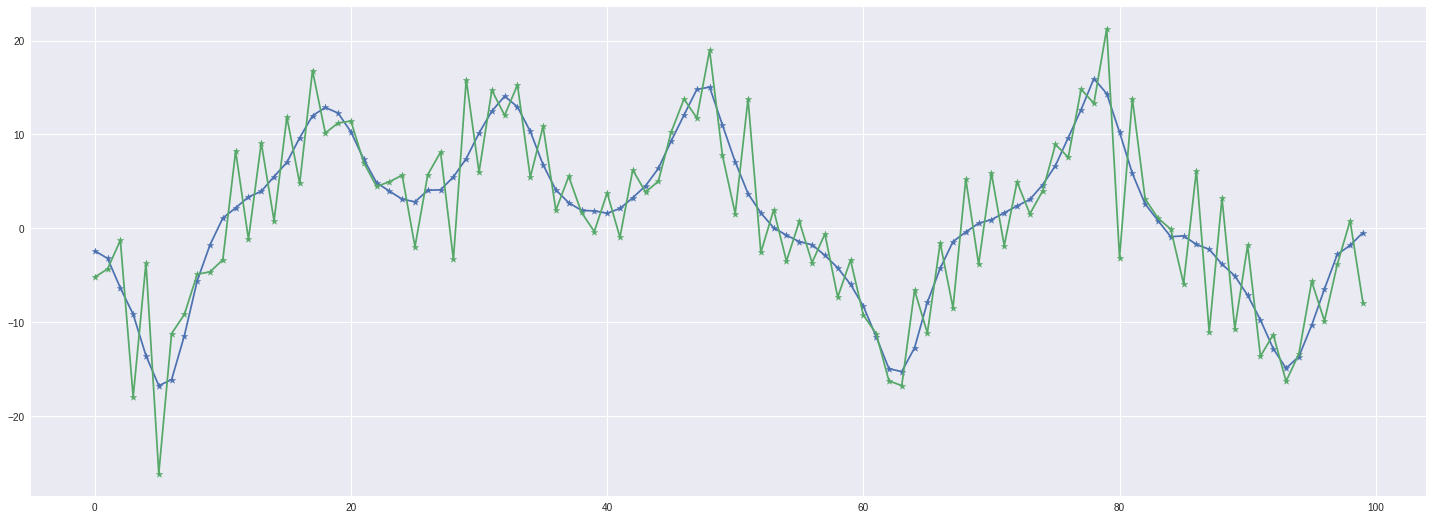

In [ ]:
x_ar4 = np.zeros(n_obs)

for count, t1 in enumerate(np.round(np.arange(0.2, T-0.05 , 0.05), 2)):
  count += 4
  t1 = round(t1, 3)

  X=np.array([t1, t1-delta_t, t1-2*delta_t,
                          t1-3*delta_t, t1-4*delta_t])
  y=np.array([ x_obs[count], x_obs[count-1],
                          x_obs[count-2], x_obs[count-3],
                          x_obs[count-4]])


  x_ar4[count+1] = AR4(X, y
                       , xnew=np.round(a = t1+0.05, decimals=3))
  
fig, ax = plt.subplots(figsize=(25, 9))

ax.scatter(range(100), x_obs[5:105], marker='*')
ax.plot(range(100), x_obs[5:105])

ax.scatter(range(100), x_ar4[5:105], marker='*')
ax.plot(range(100), x_ar4[5:105])


plt.show()



In [ ]:
np.sqrt(mse(x_obs[5:], x_ar4[5:]))

<IPython.core.display.Javascript object>

4.166643581409894

In [ ]:
Xstar.value

<IPython.core.display.Javascript object>

array([[ 1.44159749e+05],
       [-2.47444949e+04],
       [-1.70759259e+03],
       [ 5.08928558e+02],
       [-2.34901950e+01]])

### Least-squares

In [ ]:
# lsqr 

y_train = x_obs[:2005]
y_test = x_obs[2005:]




A = np.zeros(shape=(2000, 5))
Atest = np.zeros(shape=(1990, 5))
btrain = np.zeros((2000, 1))  
btest = np.zeros((1990, 1))  

for i1 in range(2000):

  A[i1,:] = [y_train[i1+4], y_train[i1+3], y_train[i1+2], y_train[i1+1], y_train[i1] ]

  btrain[i1, 0] = y_train[i1+5]

for i1 in range(1990):
  Atest[i1,:] = [y_test[i1+4], y_test[i1+3], y_test[i1+2], y_test[i1+1], y_test[i1] ]

  btest[i1, 0] = y_test[i1+5]

  

coeff = np.linalg.inv(A.T @ A) @ (A.T @ btrain)
coeff

y_preds = Atest @ coeff

np.sqrt(mse(y_test[5:], y_preds))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9897092578236939

In [ ]:
  Atest.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(1990, 5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9897092578236939

In [ ]:
xstar = cp.Variable((5, 1))
obj = cp.Minimize(cp.norm2((A @ xstar) - b.reshape(2000, 1)))
problem = cp.Problem(obj)

problem.solve(solver='MOSEK')
xstar.value

<IPython.core.display.Javascript object>

array([[-4.94839035e-01],
       [-2.20177563e-03],
       [ 1.80147397e-03],
       [-7.82831345e-06],
       [-1.30741209e-07]])

In [ ]:
X[0], y[0]

<IPython.core.display.Javascript object>

(9.8, -0.11194300181504863)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

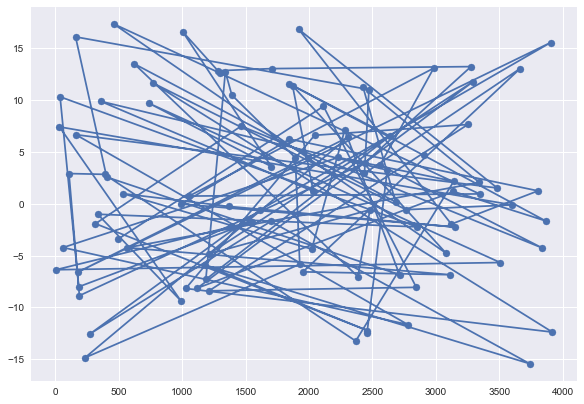

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error as mse

np.random.seed(1917)

Xobs = np.array(range(n_obs)).reshape(-1, 1)
yobs = x_obs



ind = int(n_obs/2)

X_train = Xobs[:ind]
X_test = Xobs[ind:]

y_train = x_obs[:ind]
y_test = x_obs[ind:]


X_train, X_test, y_train, y_test = tts(Xobs, yobs, test_size=0.2)


model = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
model.fit(X_train, y_train)

rf_preds = model.predict(X_train)




fig, ax = plt.subplots(constrained_layout=True)
ax.scatter(Xobs[X_train[:100]], y_train[:100]);
ax.plot(X_train[:100], y_train[:100]);

#ax.scatter(X_train[:100], rf_preds[:100]);
#ax.plot(X_train[:100], rf_preds[:100]);


plt.show()

<IPython.core.display.Javascript object>

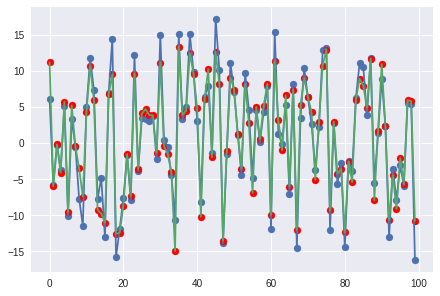

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)

xx = Xobs[X_test[:100]].flatten()
rf_preds = model.predict(X_test)

ax.scatter(range(100), yobs[xx]);
ax.plot(range(100), yobs[xx]);

ax.scatter(range(100), rf_preds[:100], c='red');
ax.plot(range(100), rf_preds[:100]);


plt.show()

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.9939258819850753, 0.9563442105816976)

# Variational DA

needs me a function for variational DA cycles. 

In [ ]:
lorenz = Lorenz63()

  
def D_Zn(n, xmodel, ymodel, zmodel):

  
  jacob = np.zeros((3, 3), dtype='object')


  jacob[0, 0] = lambda x, y, z: -sigma * x
  jacob[0, 1] = lambda x, y, z: sigma * y
  jacob[0, 2]  = lambda x, y, z: 0 


  jacob[1, 0]  = lambda x, y, z: (ro * x) - z
  jacob[1, 1]  = lambda x, y, z:  -1
  jacob[1, 2]  = lambda x, y, z: -x

  jacob[2, 0] = lambda x, y, z: y
  jacob[2, 1] = lambda x, y, z: x
  jacob[2, 2] = lambda x, y, z: -beta

  D = np.zeros(shape=(n, 3, 3))

  for N in range(n):
    for i1 in range(3):
      for i2 in range(3):
        
        D[N, i1, i2] = ( jacob[i1, i2](xmodel[n - 1], ymodel[n - 1],
                                      zmodel[n - 1]) * t_s 
        )
        D[N, i1, i2] += (i1 == i2)

  if n > 1:
    return (D[n-1, :, :] @ D[n-2, :, :]).reshape(3, 3) # needs to be changed?
  else:
    return D[n-1, :, :].reshape(3, 3)
  
def grad_L(start=0, ini=[x[0], y[0], 
                         z[0]]):
  
  global lorenz
  t1 = start
  t2 = (5 * ts_obs) + t1
  x_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[0]
  y_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[1]
  z_model = lorenz.model(t1, t2, 
                        initials=[ini[0], ini[1], ini[2] ], every=50)[2]

  Na = 5
  s = np.zeros((3, 1))
  i1 = int(start/t_s)

  for i1 in range(i1, i1 + Na):

    res = x_model[i1] - x_obs[i1] 
    s[:, 0] += D_Zn(i1+1, x_model, y_model, z_model).T @ (H.T * res)

  
  return s
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

A new Lorenz63 is born



In [ ]:
lorenz.model(0, 1)

In [ ]:
# length of each obs sequence
Na = 5

# number of DA cycles
M = 40

# observation interval
obs_step = 0.05

# step length
alpha = 0.025

# tolerance 
epsilon = 0.01

# 
H = np.array([1, 0, 0])

# nonlinear least squares optimization with gradient descent method

alpha = 0.001

iters = 2800

z_var = np.zeros(shape=(iters, 3, 1))
z_var[0, :, 0] = np.array([x[0], y[0], z[0] ])

for i1 in range(iters-1):

  z_var[i1 + 1, :] = z_var[i1, :] - (alpha * grad_L())

  zvar = z_var[i1 + 1, :, 0]
  if (np.linalg.norm(grad_L(0, zvar)) <= 0.01):
    break



zvar, np.linalg.norm(grad_L(0, zvar))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([-0.44632339, -0.56896482, 16.86999526]), 0.007849881983565945)

# MAB paper 

Lets use Random Forests to ... 

In [ ]:
lorenz = Lorenz63()
lorenz.about_me()

NameError: ignored

In [ ]:
3*N/4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

150000.0

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xm, ym, zm = lorenz.model()

ns = int(N/4)

x = lorenz.model()[0][ind[:ns]]
y = lorenz.model()[1][ind[:ns]]

z = lorenz.model()[2][ind[:ns]]
t = np.arange(0, 200, 0.001)
time = t[ind[:ns]]
x = np.array([x, y]).T
# we treat x as independent and z as independent 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.random.seed(1997)
ind = np.array(range(N))
np.random.shuffle(ind )
ind[:10]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([ 74560, 185214, 125387,  71569, 151373, 123266,  79726, 141214,
       198706, 123589])

In [ ]:
np.array(range(N))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([     0,      1,      2, ..., 199997, 199998, 199999])

<IPython.core.display.Javascript object>

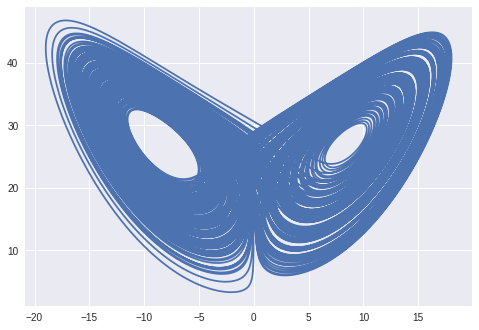

In [ ]:
# lets see the relationship : 

plt.plot(xm, zm);

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, precision_score
from sklearn.model_selection import cross_val_score
np.random.seed(1915)
x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.25)

rf_model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rf_model.fit(x_train, y_train)

y_preds = rf_model.predict(x_test)

rf_model.score(x_test, y_test), mean_squared_error(y_test, y_preds)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(0.9701603358347588, 2.2086044098518958)

In [ ]:
i = int(N-2)
i = ind[i]

rf_model.predict([[xm[i], ym[i] ]] )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([21.22448528])

In [ ]:
zm[i]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

21.395454500448345

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_model2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_model2, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

NameError: ignored

In [ ]:
best_rf = rf_random.best_estimator_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
best_rf.score(x_test, y_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.47487806488242756